# Pymaceuticals Inc.
---

### Analysis

- Mice treated with the drug regimens Capomulin and Ramicane averaged smaller tumors than mice in the other drug regimen groups. Capomulin mice had a mean tumor volume of 40.68mm3 and Ramicane mice had a mean tumor volume of 40.33mm3. Compared to the remaining seven drug regimens which had a combined average tumor volume of 53.55mm3 which was only slightly less than the placebo group average of 54.03mm3.
 
- Taking a closer look at mouse j119 of the Capomulin group, we can see that her tumor trended downward in volume over time.
 
- The success of the Capomulin and Ramicane regimen groups is also illustrated by the box plot, which shows that nearly all mice in these groups show lower final tumor volumes than the mice from the Infubinol and Ceftamin regimens.
 
- Mouse weight was found to have a 0.84 cooraltion to average tumor volume, we larger mice experiencing larger tumor volumes.

In [442]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
study_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [443]:
# Checking the number of mice.
study_data["Mouse ID"].describe()

count     1893
unique     249
top       g989
freq        13
Name: Mouse ID, dtype: object

In [444]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = study_data[study_data.duplicated(["Mouse ID", "Timepoint"])]
duplicate["Mouse ID"]

909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [21]:
# Optional: Get all the data for the duplicate mouse ID. 
study_data.loc[study_data["Mouse ID"] == "g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [29]:
study_data_df = study_data.rename(columns={"Mouse ID": "Mouse_ID", "Drug Regimen": "Drug_Regimen", "Sex": "Sex", "Age_months": "Age_months",
                          "Weight (g)": "Weight(g)", "Timepoint": "Timepoint", "Tumor Volume (mm3)": "Tumor_Volume(mm3)",
                          "Metastatic Sites": "Metastatic_Sites"})
study_data_df.head()

,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight(g),Timepoint,Tumor_Volume(mm3),Metastatic_Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [35]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = study_data_df[study_data_df["Mouse_ID"] != "g989"]
clean_data.head()

,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight(g),Timepoint,Tumor_Volume(mm3),Metastatic_Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [36]:
# Checking the number of mice in the clean DataFrame.
clean_data["Mouse_ID"].describe()

count     1880
unique     248
top       l700
freq        10
Name: Mouse_ID, dtype: object

## Summary Statistics

In [446]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

tumor_data = clean_data.loc[:, ["Drug_Regimen", "Tumor_Volume(mm3)"]]
median_data = tumor_data.groupby(tumor_data["Drug_Regimen"]).median()
mean_data = tumor_data.groupby(tumor_data["Drug_Regimen"]).mean()
var_data = tumor_data.groupby(tumor_data["Drug_Regimen"]).var()
std_data = tumor_data.groupby(tumor_data["Drug_Regimen"]).std()
sem_data =tumor_data.groupby(tumor_data["Drug_Regimen"]).sem()

mean_median = pd.merge(mean_data, median_data, on="Drug_Regimen")
mean_median_var = pd.merge(mean_median, var_data, on= "Drug_Regimen")
new = mean_median_var.rename(columns={"Tumor_Volume(mm3)_x": "Mean Tumor Vol.(mm3)", "Tumor_Volume(mm3)_y": "Median Tumor Vol.(mm3)",
                          "Tumor_Volume(mm3)": "Tumor Vol.(mm3) Variance"})
mean_median_var_std = pd.merge(new, std_data, on= "Drug_Regimen")
summary = pd.merge(mean_median_var_std, sem_data, on= "Drug_Regimen")
summary_df = summary.rename(columns={"Mean Tumor Vol.(mm3)": "Mean Tumor Vol.(mm3)", "Median Tumor Vol.(mm3)": "Median Tumor Vol.(mm3)",
                          "Tumor Vol.(mm3) Variance": "Tumor Vol.(mm3) Variance","Tumor_Volume(mm3)_x": "Tumor Vol.(mm3) Std. Dev.",
                                     "Tumor_Volume(mm3)_y": "Tumor Vol.(mm3) SEM"})
summary_df



,Mean Tumor Vol.(mm3),Median Tumor Vol.(mm3),Tumor Vol.(mm3) Variance,Tumor Vol.(mm3) Std. Dev.,Tumor Vol.(mm3) SEM
Drug_Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [447]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_stats = tumor_data.groupby("Drug_Regimen").agg(func=['mean', 'median', np.var, 'std', 'sem'])
summary_stats

Tumor_Volume(mm3)                                          
                          mean     median        var       std       sem
Drug_Regimen                                                            
Capomulin            40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin             52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol            52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril             55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol             54.331565  52.509285  66.173479  8.134708  0.596466
Placebo              54.033581  52.288934  61.168083  7.821003  0.581331
Propriva             52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane             40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn             54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol            53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice Tested')

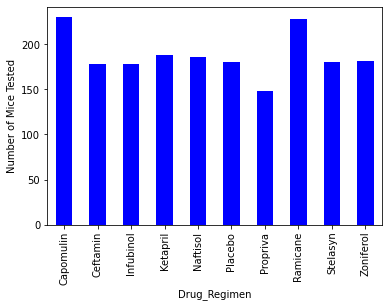

In [116]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mouse_count = clean_data.groupby("Drug_Regimen")["Timepoint"].count()
figure1 = mouse_count.plot(kind="bar", facecolor="blue")
figure1.set_ylabel("Number of Mice Tested")

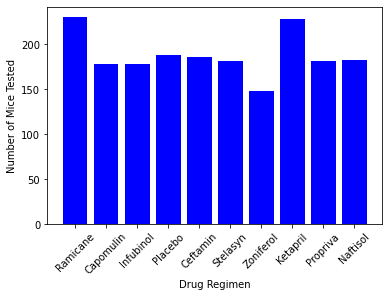

In [117]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drugs = clean_data["Drug_Regimen"].unique()
#mouse_count = clean_data.groupby("Drug_Regimen")["Timepoint"].count()

plt.bar(drugs, mouse_count, color="blue", align="center")
plt.xticks(rotation=45)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()


Text(0, 0.5, 'Mouse Sex')

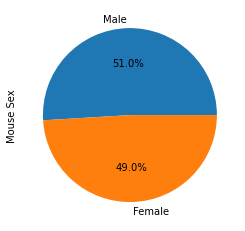

In [319]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_sex_count = clean_data["Sex"].value_counts()
mouse_sex_count
mouse_sex_pie = mouse_sex_count.plot(kind="pie", y="Sex", autopct="%1.1f%%")
mouse_sex_pie.set_ylabel("Mouse Sex")

Text(0, 0.5, 'Mouse Sex')

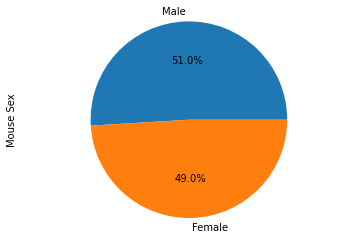

In [323]:
# Generate a pie plot showing the distribution of female versus male mice using PyPlot
mouse_sex_df = pd.DataFrame(mouse_sex_count)
labels = clean_data["Sex"].unique()
sizes = mouse_sex_df["Sex"]
plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.axis("equal")
plt.ylabel("Mouse Sex")

## Quartiles, Outliers and Boxplots

In [370]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

data_sort = clean_data.sort_values("Timepoint")

data_final = clean_data.groupby("Mouse_ID").last()

data_final_df = pd.DataFrame(data_final)

Infubinol = pd.DataFrame(data_final_df.loc[data_final_df["Drug_Regimen"] == "Infubinol"])
Capomulin = pd.DataFrame(data_final_df.loc[data_final_df["Drug_Regimen"] == "Capomulin"])
Ramicane = pd.DataFrame(data_final_df.loc[data_final_df["Drug_Regimen"] == "Ramicane"])
Ceftamin = pd.DataFrame(data_final_df.loc[data_final_df["Drug_Regimen"] == "Ceftamin"])

Capomulin


,Drug_Regimen,Sex,Age_months,Weight(g),Timepoint,Tumor_Volume(mm3),Metastatic_Sites
Mouse_ID,,,,,,,
b128,Capomulin,Female,9,22,45,38.982878,2
b742,Capomulin,Male,7,21,45,38.939633,0
f966,Capomulin,Male,16,17,20,30.485985,0
g288,Capomulin,Male,3,19,45,37.074024,1
g316,Capomulin,Female,22,22,45,40.159220,2
i557,Capomulin,Female,1,24,45,47.685963,1
i738,Capomulin,Female,23,20,45,37.311846,2
j119,Capomulin,Female,7,23,45,38.125164,1
j246,Capomulin,Female,21,21,35,38.753265,1


In [362]:
tumor = data_final_df[["Drug_Regimen", "Tumor_Volume(mm3)"]]

cap_list = Capomulin["Tumor_Volume(mm3)"].values.tolist()
ram_list = Ramicane["Tumor_Volume(mm3)"].values.tolist()
inf_list = Infubinol["Tumor_Volume(mm3)"].values.tolist()
cef_list = Ceftamin["Tumor_Volume(mm3)"].values.tolist()

vol_by_drug = pd.DataFrame({"Capomulin":cap_list, "Ramicane": ram_list, "Infubinol": inf_list, "Ceftamin": cef_list})

vol_by_drug


,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,38.407618,67.973419,62.999356
1,38.939633,43.047543,65.525743,45.000000
2,30.485985,38.810366,57.031862,56.057749
3,37.074024,32.978522,66.083066,55.742829
4,40.159220,38.342008,72.226731,48.722078
5,47.685963,33.397653,36.321346,47.784682
6,37.311846,37.311236,60.969711,61.849023
7,38.125164,40.659006,62.435404,68.923185
8,38.753265,29.128472,60.918767,67.748662
9,41.483008,33.562402,67.289621,57.918381


# Quartiles, Outliers, and Box Plot

In [449]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = [Capomulin, Ramicane, Infubinol, Ceftamin]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate IQR
for treatment in treatments:
    tumor_vol = treatment["Tumor_Volume(mm3)"]
    quartiles = pd.DataFrame(tumor_vol.quantile([.25, .5, .75]))
    iqr = quartiles.iloc[2] - quartiles.iloc[0]

# Potential outliers
    lower_bound = quartiles.iloc[0] - (1.5 * iqr)
    upper_bound = quartiles.iloc[2] + (1.5 * iqr)

    
    low_outliers = treatment.loc[treatment["Tumor_Volume(mm3)"] < float(lower_bound), "Tumor_Volume(mm3)"]
    high_outliers = treatment.loc[treatment["Tumor_Volume(mm3)"] > float(upper_bound), "Tumor_Volume(mm3)"]
    
    print("Potential Outliers:")
    print(high_outliers)
    print(low_outliers)    

Potential Outliers:
Series([], Name: Tumor_Volume(mm3), dtype: float64)
Series([], Name: Tumor_Volume(mm3), dtype: float64)
Potential Outliers:
Series([], Name: Tumor_Volume(mm3), dtype: float64)
Series([], Name: Tumor_Volume(mm3), dtype: float64)
Potential Outliers:
Series([], Name: Tumor_Volume(mm3), dtype: float64)
Mouse_ID
c326    36.321346
Name: Tumor_Volume(mm3), dtype: float64
Potential Outliers:
Series([], Name: Tumor_Volume(mm3), dtype: float64)
Series([], Name: Tumor_Volume(mm3), dtype: float64)


Text(0, 0.5, 'Final Tumor Volume (mm3)')

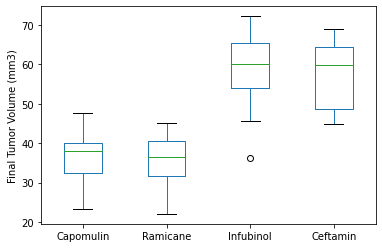

In [411]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
figure1 = vol_by_drug[["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]].plot(kind="box")
plt.ylabel("Final Tumor Volume (mm3)")


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

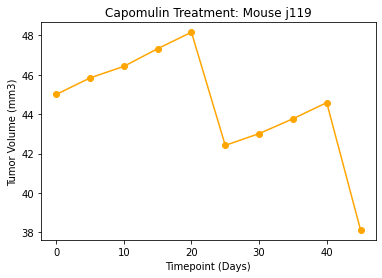

In [378]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# j119 Capomulin Female 7months 23grams timepoint:45 final_tumor mass: 38.125164mm3 sites:1
# Mouse_ID j119
# Mouse Name: Sunny
sunny = clean_data.loc[clean_data["Mouse_ID"] == "j119", :]

sunny_y = sunny["Tumor_Volume(mm3)"]
sunny_x = sunny["Timepoint"]

sunny_plot = plt.plot(sunny_x, sunny_y, marker="o", color="orange")
plt.title("Capomulin Treatment: Mouse j119")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")


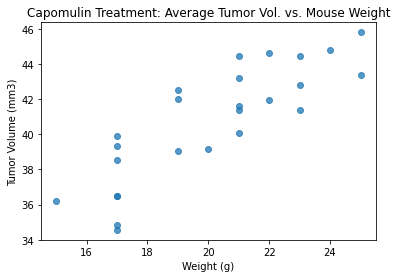

In [391]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_data = clean_data.loc[clean_data["Drug_Regimen"] == "Capomulin", :]
cap_data_avg = cap_data.groupby("Mouse_ID").mean()
weight_cap = cap_data_avg["Weight(g)"]
tumor_cap = cap_data_avg["Tumor_Volume(mm3)"]

plt.scatter(weight_cap, tumor_cap, marker="o", alpha=0.75)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment: Average Tumor Vol. vs. Mouse Weight")
plt.show()


## Correlation and Regression

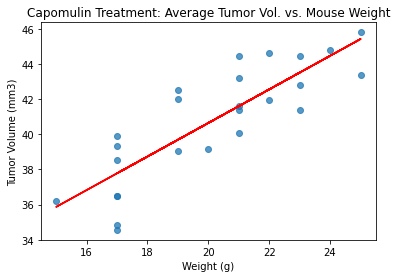

 The correlation between mouse weight and average tumor volume is 0.84


In [410]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
plt.scatter(weight_cap, tumor_cap, marker="o", alpha=0.75)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment: Average Tumor Vol. vs. Mouse Weight")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight_cap, tumor_cap)
regress_values = weight_cap * slope + intercept

m = round(slope,2)
b = round(intercept,2)
line_eq = f"y = {m}x + {b}"

plt.plot (weight_cap, regress_values, "r-")
plt.plot(weight_cap, intercept + slope*(weight_cap), 'r', label='fitted line')

plt.show()
print(f" The correlation between mouse weight and average tumor volume is {round(rvalue, 2)}")